<a href="https://colab.research.google.com/github/MuthomiTed/Predicting-individuals-likely-to-have-or-use-a-bank-account/blob/master/DS_Core_Independent_Project_Week_1_Muthomi_Ted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='black'> INDEPENDENT PROJECT WEEK 1


##<font color = 'brown'> 1. Defining the Question

### a) Specifying the Data Analytic Question

> To figure out how we can predict which individuals are most likely to have or use a bank account in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### b) Defining the Metric for Success

> In order to work on the above problem, we need to do the following:

1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question

2. Find and deal with outliers, anomalies, and missing data within the dataset.

3. Plot univariate and bivariate summaries recording our observations.

4. Implement the solution by performing the respective analysis i.e. reduction, modeling, etc.

5. Challenge our solution by providing insights on how we can make improvements.

### c) Understanding the context 

> The main dataset contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018.

### d) Recording the Experimental Design

> True Experimental Research Design

### e) Data Relevance

> Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

>Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. 

>Therefore, access to bank accounts is an essential contributor to long-term economic growth.

##<font color = 'brown'> 2. Reading the Data

### Importing Libraries

In [0]:
# Importing os
import os

# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Seaborn
import seaborn as sns

# Importing researchpy
!pip install researchpy
import researchpy as rp

# Importing scipy from stats
from scipy import stats

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_ind

# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_1samp

from IPython.display import display


### Loading the dataset

In [0]:
# Loading the Data from the source i.e. csv
# ---
# Dataset url = http://bit.ly/FinancialDataset
# ---
df = pd.read_csv('http://bit.ly/FinancialDataset')

##<font color = 'brown'> 3. Checking the Data

In [0]:
# Determining the no. of records in our dataset
#
print('This dataset has ', df.shape[1], ' columns and ', df.shape[0], ' rows!')

This dataset has  13  columns and  23524  rows!


In [0]:
# Previewing the top of our dataset
#
df.head(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [0]:
# Previewing the bottom of our dataset
# 
df.tail(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [0]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [36]:
# checking the profile of our dataset
import pandas_profiling
pandas_profiling.ProfileReport(df)

Number of variables,13
Number of observations,23524
Total Missing (%),0.1%
Total size in memory,2.3 MiB
Average record size in memory,104.0 B
Numeric,3
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


##<font color = 'brown'> 4. Tidying the Dataset

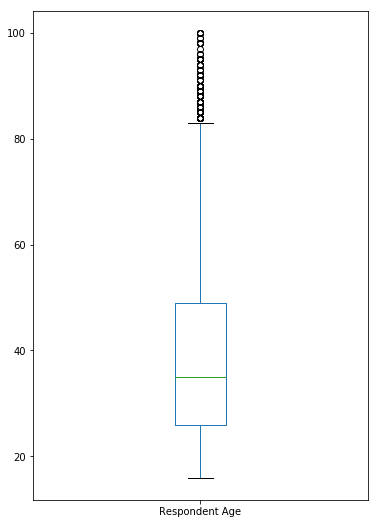

In [0]:
# Checking for Outliers
#
# Outliers in Respondents Ages 

df['Respondent Age'].plot.box(figsize=(6,9))

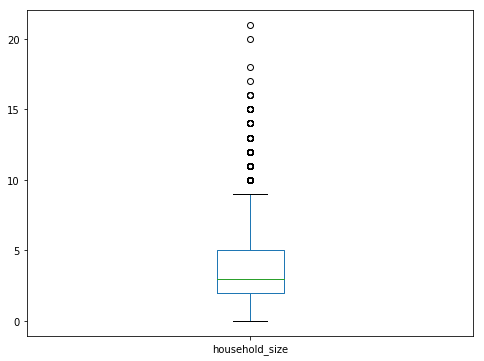

In [0]:
# Outliers in Household size

df.household_size.plot.box(figsize=(8,6))

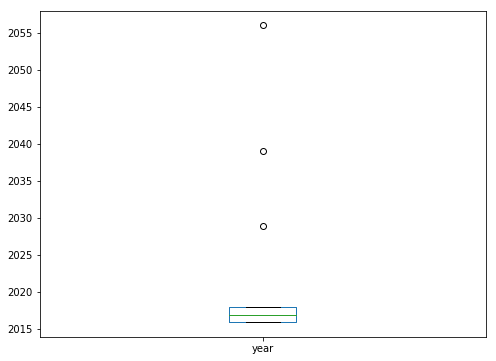

In [0]:
# Outliers in year column

df.year.plot.box(figsize=(8,6))

In [0]:
# Since the year column was the only column with irrelevant outliers 
# we shall deal with them here by removing data not within the years
# specified in the research question (2016-2018)

# Checking for unique values in year column

print(df.year.unique())

[2018 2029 2056 2016 2039 2017]


In [0]:
# Dropping irrelavant year rows

print(df.year.unique())
a = df[(df['year'] == 2029) | (df['year'] == 2039) | (df['year'] == 2056)].index
df.drop(a,inplace = True)
df.year.unique()

[2018 2029 2056 2016 2039 2017]


array([2018, 2016, 2017])

In [0]:
# Identifying existence of missing data in the dataset
df.isnull().values.any()

True

In [0]:
# Calculating number of missing values per column 

df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [0]:
# Dealing with missing data
# Since the elimination of missing data will not affect results in this case 
# we shall do away with them

print(df.shape)

df = df.dropna()

print(df.shape)

(23521, 13)
(23340, 13)


In [0]:
# Checking for Anomalies
#

df.describe()

,year,household_size,Respondent Age
count,23340.000000,23340.000000,23340.000000
mean,2016.977464,3.688560,38.807069
std,0.849136,2.281275,16.519905
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [0]:
# Checking for unique values count per column in dataframe

df.nunique()


country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [0]:
# More data cleaning procedures
#
# Dropping column uniqueid due to its irrelevance in the dataset

df.drop('uniqueid',axis = 1,inplace = True)

In [0]:
# Changing columns to lower case for easier column distinction

df.columns  = df.columns.str.lower()

In [0]:
# Renaming mispelt columns

df.columns  = df.columns.str.replace('educuation', 'education').str.replace('relathip', 'relationship').str.replace(' ', '_')

In [0]:
# Previewing clean column names 

df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

In [0]:
# Checking unique values and number of rows asigned for each column in the dataset

for i in df.columns:
  print('\n')
  print(df[i].value_counts())






Rwanda      8683
Tanzania    6500
Kenya       6062
Uganda      2095
Name: country, dtype: int64


2016    8683
2018    8157
2017    6500
Name: year, dtype: int64


No     20044
Yes     3296
Name: has_a_bank_account, dtype: int64


Rural    14263
Urban     9077
Name: type_of_location, dtype: int64


Yes    17331
No      6009
Name: cell_phone_access, dtype: int64


2.0     5072
1.0     3928
3.0     3513
4.0     3199
5.0     2716
6.0     2028
7.0     1378
8.0      740
9.0      354
10.0     191
12.0      66
11.0      66
0.0       36
13.0      25
15.0      11
14.0       9
16.0       4
18.0       1
20.0       1
21.0       1
17.0       1
Name: household_size, dtype: int64


30.0     1043
35.0      831
25.0      785
28.0      742
32.0      707
40.0      682
20.0      622
26.0      611
18.0      583
23.0      580
27.0      566
45.0      561
22.0      560
24.0      558
38.0      551
33.0      526
34.0      515
29.0      514
17.0      474
21.0      469
19.0      466
31.0      462
16.0      459


In [0]:
# Previewing clean dataset

df.head(2)

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [0]:
df = df.to_csv('df.csv')

##<font color = 'brown'> 5. Exploratory Analysis

In [0]:
# Retrieving clean dataframe

df = pd.read_csv('df.csv',index_col = 0)

In [107]:
# Our dataset has variables whose values are in text format. 
# For such values to be represented accurately in our analysis plots we shall asign them numeric representatives


dummy = pd.get_dummies(df[['type_of_location','gender_of_respondent', 'has_a_bank_account',	'cell_phone_access', 'the_relationship_with_head', 'marital_status', 'level_of_education', 'type_of_job']])
dummy.head(2)

,type_of_location_Rural,type_of_location_Urban,gender_of_respondent_Female,gender_of_respondent_Male,has_a_bank_account_No,has_a_bank_account_Yes,cell_phone_access_No,cell_phone_access_Yes,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [0]:
# We shall then merge dummy values to our dataframe

df = pd.concat([df,dummy],axis = 1)

In [109]:
df.shape

(23340, 48)

### Univariate Analysis

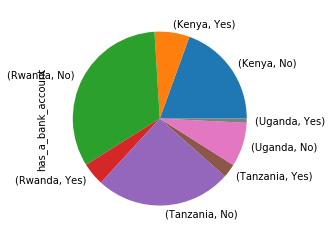

In [0]:
# Ploting the univariate summaries and recording our observations

# Respondents with bank accounts per country

df.groupby('country')['has_a_bank_account'].value_counts().plot.pie()

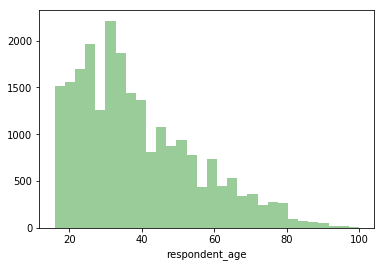

In [0]:
# Distribution of respondents age
#
sns.distplot(df.respondent_age, kde=False, bins = 30,color = 'green')


In [0]:
# Observation:Respondent age has a positively skewed shape, not a continuously increasing one. 

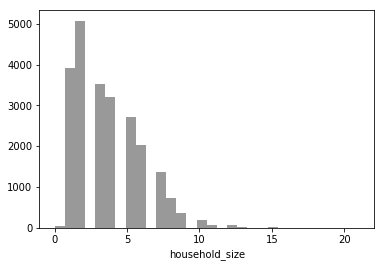

In [30]:
# Distribution of household size
#
sns.distplot(df.household_size, kde=False, bins = 30,color = 'black')


In [0]:
# Observation:Household size has a continuously decreasing positively skewed shape.

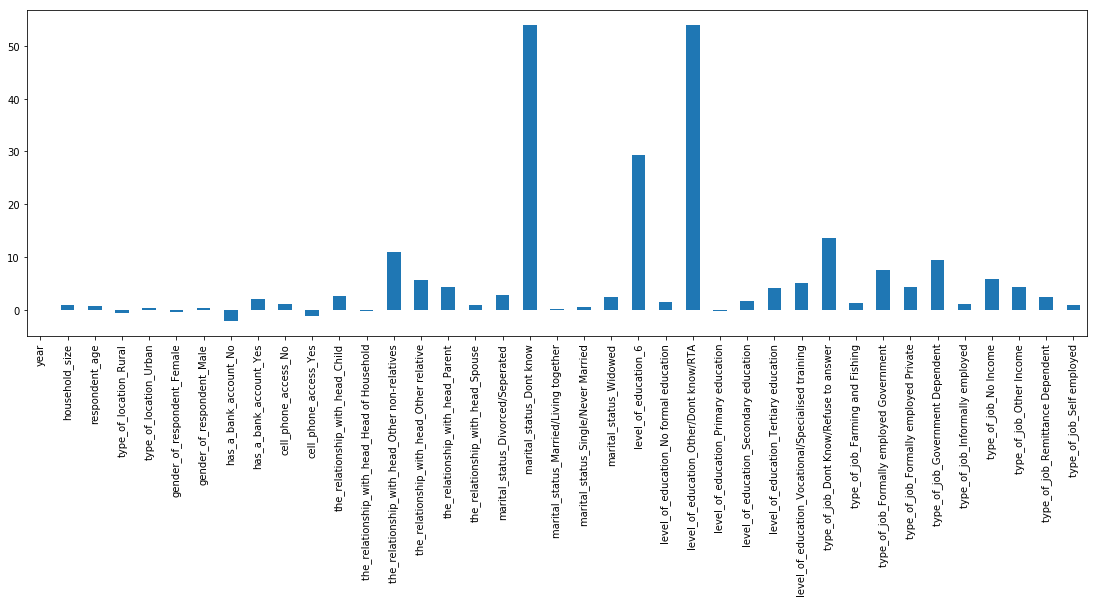

In [0]:
# Skew measurements for entire datafame

df.skew().plot.bar(figsize =(19,6), color = 'brown')

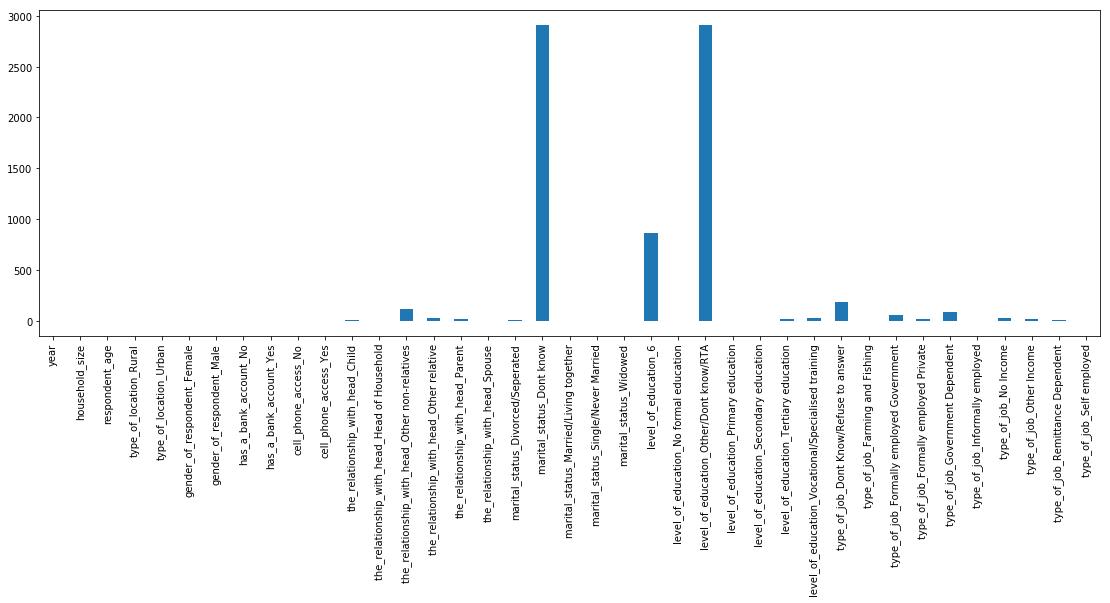

In [0]:
# Measuring curtosis

df.kurt().plot.bar(figsize =(19,6), color = 'red')

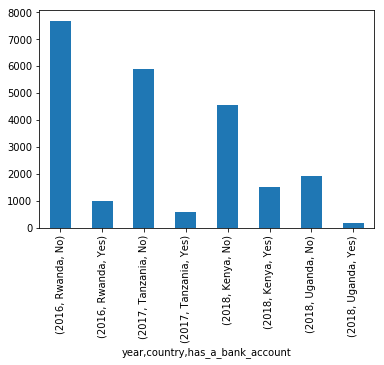

In [18]:
# Respondents with bank account per year

df.groupby(['year','country'])['has_a_bank_account'].value_counts().plot.bar(color = 'green')

In [0]:
# Observation: each country has data unique to a specific year. Results of respondents with bank accounts per year may be biased

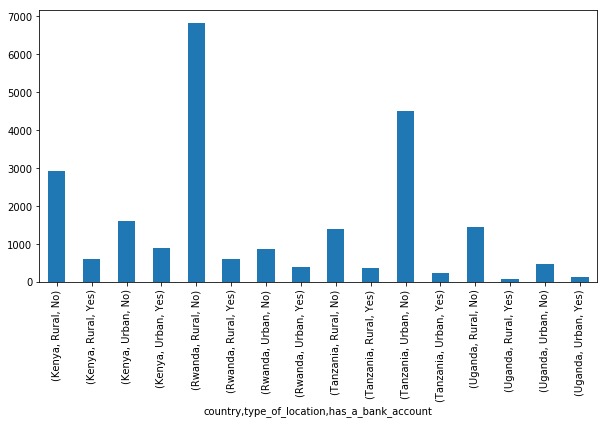

In [28]:
# Relationship between countries and having a bank account

df.groupby(['country','type_of_location'])['has_a_bank_account'].value_counts().plot.bar(figsize = (10,5), color  = 'black') 

In [0]:
# Observation: 1. In Tanzania, respondents in the rural areas had more bank accounts than in urban locations unlike other countries

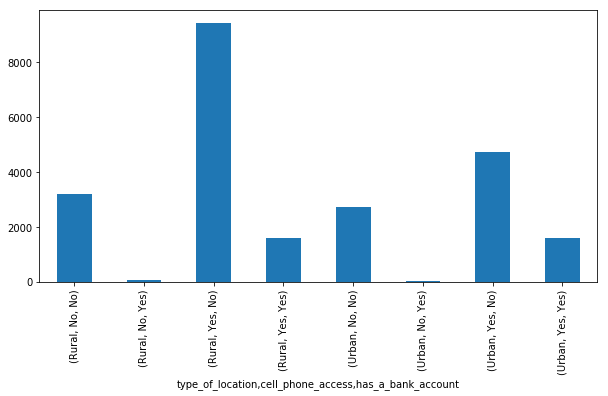

In [23]:
# Relationship between type of location, cell phone access and having a bank account

df.groupby(['type_of_location','cell_phone_access'])['has_a_bank_account'].value_counts().plot.bar(figsize = (10,5), color = 'yellow') 

In [0]:
# Observation: 1. Respondents without cell phone access are unlikely to have a bank account despite location
#              2. The majority of respondents are in the rural locations

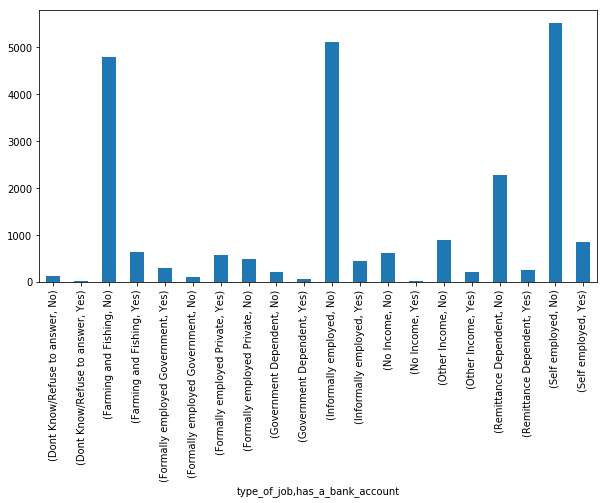

In [24]:
# Relationship between type of job and having a bank account

df.groupby(['type_of_job'])['has_a_bank_account'].value_counts().plot.bar(figsize = (10,5)) 

In [0]:
# Observation: 1. Respondents with no source of income had no bank accounts
#              2. A majority of respondents working for the government as well as those formally employed had a bank account
#              3. A majority of respondents who were self employed,informally employed,remittance dependent or working in farming % fishing had no bank account

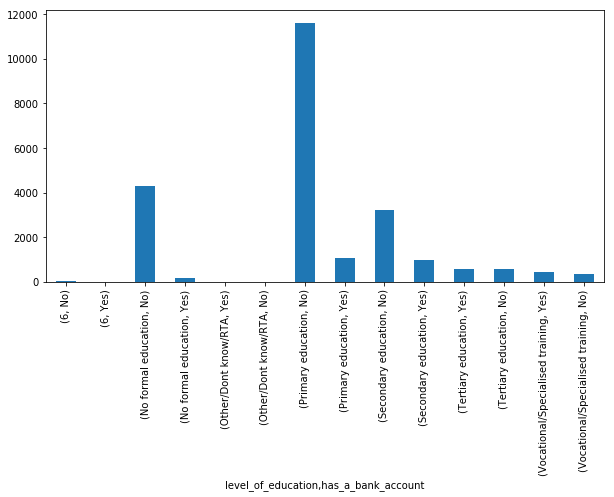

In [29]:
# Relationship between level of education and having a bank account

df.groupby(['level_of_education'])['has_a_bank_account'].value_counts().plot.bar(figsize = (10,5)) 

In [0]:
# Observation: 1. A majority of respondents who had attained tertiary education as well as those who had underwent specialised training had bank accounts
#              2. Respondents with no formal education had the least portion of individuals without a bank account.

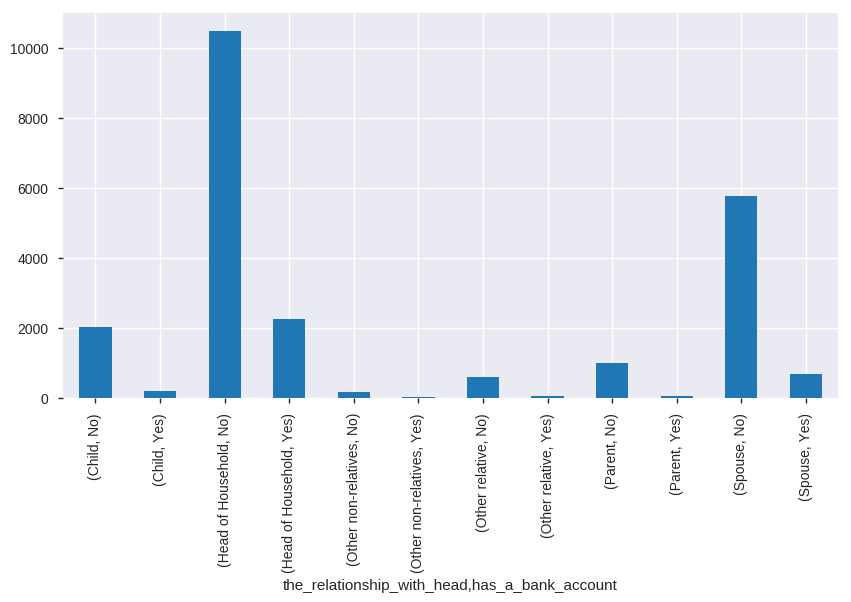

In [86]:
# Relationship between respondents' relationship with head of family and having a bank account

df.groupby(['the_relationship_with_head'])['has_a_bank_account'].value_counts().plot.bar(figsize = (10,5)) 

### Bivariate Analysis

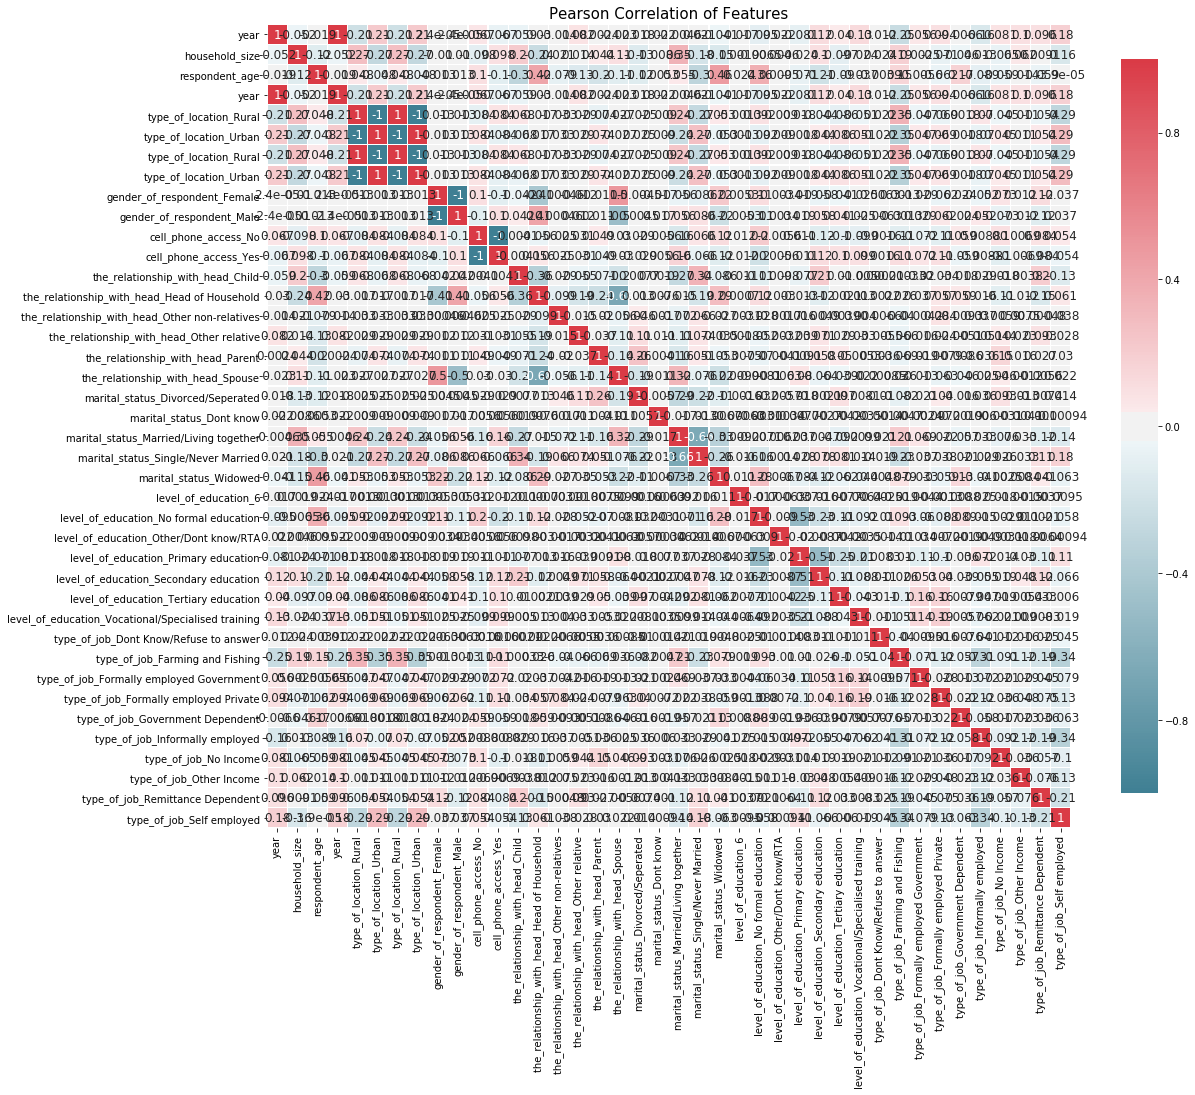

In [0]:
# Ploting the bivariate summaries and recording our observations
#
# correlation heatmap of dataset

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(18, 15))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

In [0]:
# Observation: location,cell phone access,type of job and level of education have the highest correlation to having a bank account

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<Figure size 720x360 with 0 Axes>

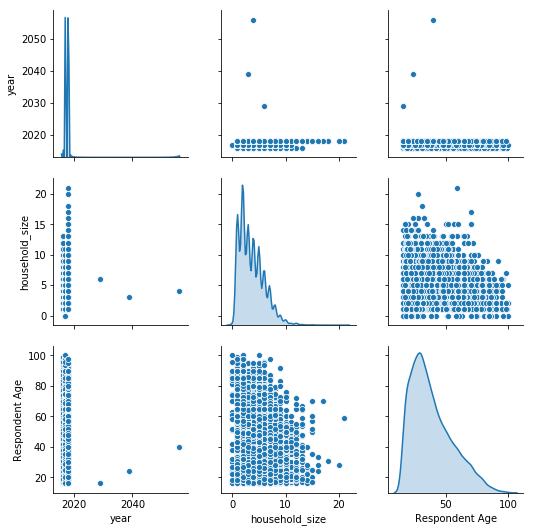

In [34]:
# Crossplots distribution

plt.figure(figsize=(10, 5))




sns.pairplot(df, diag_kind='kde');

### Multivariate Analysis


In [0]:
# Retrieving dataframe

df = pd.read_csv('df.csv',index_col = 0)

In [0]:
# Importing necessary libraries for accuracy testing and dimension reduction


from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [125]:
# Our dataset has variables whose values are in text format. 
# For such values to be represented accurately in our accuracy test we shall asign them numeric representatives

dummy = pd.get_dummies(df[[ 'the_relationship_with_head', 'marital_status', 'level_of_education', 'type_of_job']])
dummy.head(2)

,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [0]:
# We shall then merge dummy values to our dataframe

df = pd.concat([df,dummy],axis = 1)

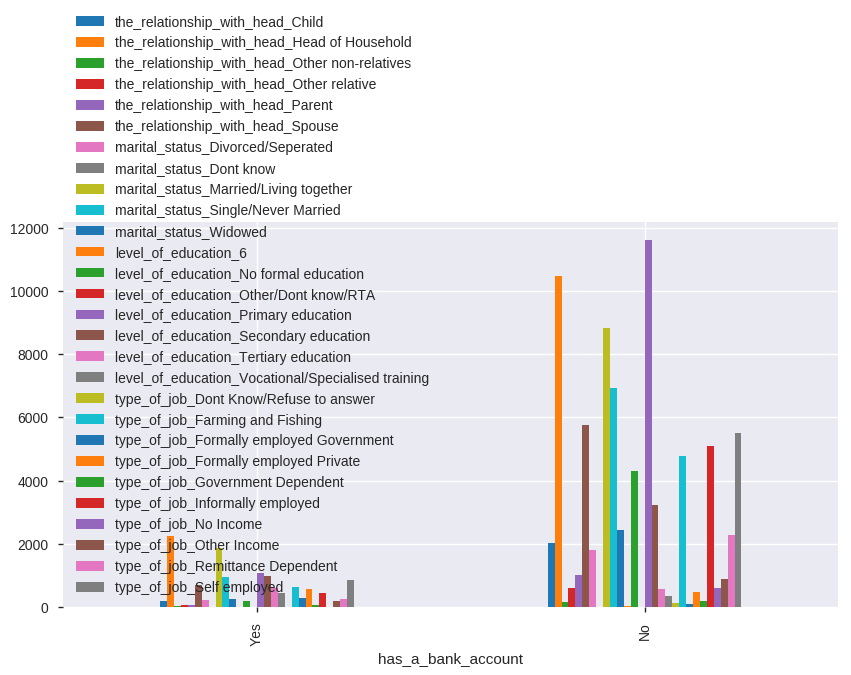

In [127]:
# Ploting the multivariate summaries and recording our observations
#
df.drop(['year','respondent_age','household_size'],inplace = True,axis = 1)
x = df.groupby(['has_a_bank_account']).sum().copy()
ax = x.sort_values(by = 'has_a_bank_account',ascending=False).plot(kind='bar', figsize=(10, 5));


In [129]:
df.columns

Index(['country', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'gender_of_respondent',
       'the_relationship_with_head', 'marital_status', 'level_of_education',
       'type_of_job', 'the_relationship_with_head_Child',
       'the_relationship_with_head_Head of Household',
       'the_relationship_with_head_Other non-relatives',
       'the_relationship_with_head_Other relative',
       'the_relationship_with_head_Parent',
       'the_relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'level_of_education_6', 'level_of_education_No formal education',
       'level_of_education_Other/Dont know/RTA',
       'level_of_education_Primary education',
       'level_of_education_Secondary education',
       'level_of_education_Tertiary education',
       'level_of_education_Vocational/Spec

In [0]:
# We shall first map the unique values in the columns with objects to integers for accuracy testing

df['has_a_bank_account'] = df.has_a_bank_account.map({'Yes':1, 'No':0})

df['type_of_location'] = df.type_of_location.map({'Urban':1, 'Rural':0})

df['cell_phone_access'] = df.cell_phone_access.map({'Yes':1, 'No':0})

df['gender_of_respondent'] = df.gender_of_respondent.map({'Male':1, 'Female':0})


In [130]:
df.tail(2)

,country,has_a_bank_account,type_of_location,cell_phone_access,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
23522,Uganda,0,1,1,0,Parent,Divorced/Seperated,Secondary education,Self employed,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
23523,Uganda,0,0,1,1,Child,Single/Never Married,Secondary education,No Income,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [131]:
# Selecting the columns to be used as data for accuracy testing

cols = [col for col in df.columns if col not in ['has_a_bank_account','country','the_relationship_with_head', 'marital_status', 
                                                 'level_of_education','type_of_job'
                                                ]]
data = df[cols]

#assigning the 'has a bank account' column as target
target = df['has_a_bank_account']
data.head(2)


,type_of_location,cell_phone_access,gender_of_respondent,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [0]:
# Import the necessary module for model selection
from sklearn.model_selection import train_test_split

#spliting data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 0)


In [133]:
# We shall then compute accuracy using P.C.A

# for loop will check for accuracy in all components
components = {}

X = df.drop(['has_a_bank_account','country','the_relationship_with_head', 'marital_status', 'level_of_education','type_of_job'], 1)
y = df['has_a_bank_account']
  
for i in np.arange(1, len(X.columns)+1):
  # Splitting the dataset into the Training set and Test set
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
  
  
  # Standardising the data
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  
  # Applying PCA
  from sklearn.decomposition import PCA
  pca = PCA(n_components = i)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  
  
  # Training and Making Predictions
  # The random forest classification classifier has been used to make predictions.
  from sklearn.linear_model import LogisticRegression
  classifier = LogisticRegression(random_state = 0)
  classifier.fit(X_train, y_train)
  
  
  # Predicting the Test set results
  y_pred = classifier.predict(X_test)
  
  
  # Performing evaluation
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score
  cm = confusion_matrix(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  print(cm)
  print(acc)
components.update({'n_components ' + str(i) : 'accuracy ' + str(acc*100)})
components


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[5029    0]
 [ 806    0]]
0.8618680377035133
[[5029    0]
 [ 806    0]]
0.8618680377035133


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[5029    0]
 [ 806    0]]
0.8618680377035133
[[4996   33]
 [ 705  101]]
0.8735218508997429


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4944   85]
 [ 591  215]]
0.8841473864610111
[[4944   85]
 [ 591  215]]
0.8841473864610111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4946   83]
 [ 594  212]]
0.8839760068551842
[[4937   92]
 [ 578  228]]
0.8851756640959726


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4934   95]
 [ 576  230]]
0.8850042844901457
[[4940   89]
 [ 578  228]]
0.8856898029134533


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4941   88]
 [ 578  228]]
0.8858611825192803
[[4940   89]
 [ 575  231]]
0.886203941730934


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4934   95]
 [ 571  235]]
0.8858611825192803
[[4930   99]
 [ 563  243]]
0.8865467009425878


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4938   91]
 [ 566  240]]
0.8874035989717224
[[4938   91]
 [ 565  241]]
0.8875749785775493


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4932   97]
 [ 563  243]]
0.8868894601542416


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4940   89]
 [ 570  236]]
0.8870608397600686


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4933   96]
 [ 569  237]]
0.8860325621251071


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4941   88]
 [ 568  238]]
0.8875749785775493


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4943   86]
 [ 576  230]]
0.8865467009425878


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4942   87]
 [ 572  234]]
0.8870608397600686


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4938   91]
 [ 564  242]]
0.8877463581833762


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4939   90]
 [ 562  244]]
0.8882604970008569
[[4940   89]
 [ 560  246]]
0.8887746358183376


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4943   86]
 [ 563  243]]
0.8887746358183376


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4932   97]
 [ 555  251]]
0.8882604970008569


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4932   97]
 [ 555  251]]
0.8882604970008569


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4932   97]
 [ 555  251]]
0.8882604970008569


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4932   97]
 [ 555  251]]
0.8882604970008569
[[4932   97]
 [ 555  251]]
0.8882604970008569


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'n_components 31': 'accuracy 88.82604970008569'}

In [135]:
#Checking for accuracy using Naive Bayes
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


#create an object of the type GaussianNB
gnb = GaussianNB()


#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)

print(pred.tolist())
print ('the accuracy score of the model')
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))


[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 

##<font color = 'brown'> 6. Implementing the Solution

In [141]:
df.columns

Index(['country', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'gender_of_respondent',
       'the_relationship_with_head', 'marital_status', 'level_of_education',
       'type_of_job', 'the_relationship_with_head_Child',
       'the_relationship_with_head_Head of Household',
       'the_relationship_with_head_Other non-relatives',
       'the_relationship_with_head_Other relative',
       'the_relationship_with_head_Parent',
       'the_relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'level_of_education_6', 'level_of_education_No formal education',
       'level_of_education_Other/Dont know/RTA',
       'level_of_education_Primary education',
       'level_of_education_Secondary education',
       'level_of_education_Tertiary education',
       'level_of_education_Vocational/Spec

                            OLS Regression Results                            
Dep. Variable:     has_a_bank_account   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     282.6
Date:                Tue, 13 Aug 2019   Prob (F-statistic):               0.00
Time:                        10:32:40   Log-Likelihood:                -5193.8
No. Observations:               23340   AIC:                         1.044e+04
Df Residuals:                   23312   BIC:                         1.067e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1440      0.018      8.101      0.0

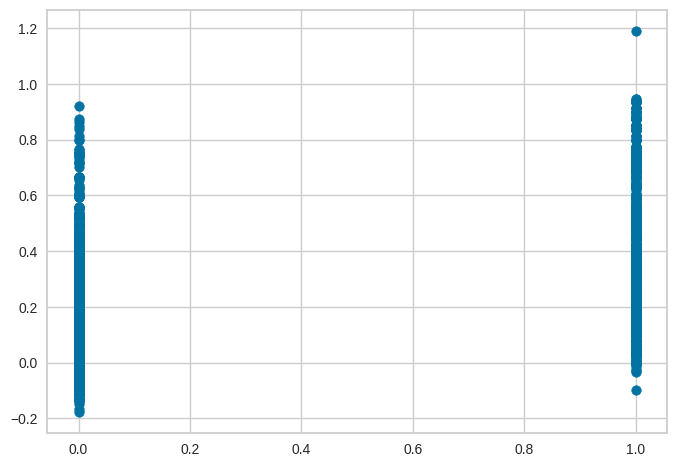

In [140]:
#linear regression
lm = LinearRegression()
results = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
predictions

plt.scatter(y_test,predictions)
r2_score(y_test, predictions)
(lm.coef_, lm.intercept_)
X2 = sm.add_constant(X.values)
model = sm.OLS(y, X2).fit()
print(model.summary())

## <font color = 'brown'>6. Challenging the solution

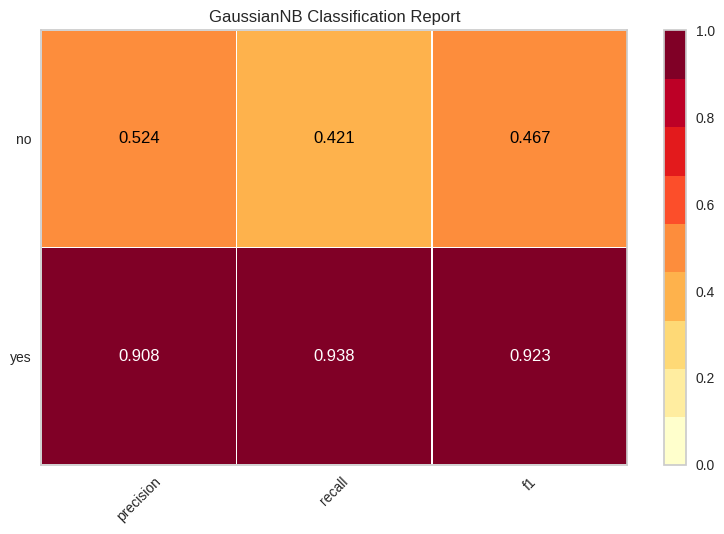

In [138]:
# Reviewing the Solution 
#
#Using Naive Bayes to challenge the solution

from yellowbrick.classifier import ClassificationReport


# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=['yes','no'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data


## <font color = 'brown'>7. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

> Yes. The data given was relevant to the research question

### b). Do we need other data to answer our question?

>  Yes. Data that is time specific would have proved vital to the research while comparing respondents with bank accounts on a time basis

### c). Did we have the right question?

> Yes. The question was detailed enough without being  restrictive 